In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data= pd.read_csv('C:/Users/me/Desktop/pyt/kaggle/Glass/glass.csv')

## EXPLORING DATA

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
print('There are ',data.shape[0] ,'rows and ',data.shape[1],' columns.')

There are  214 rows and  10  columns.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.52,0.00,1.51,1.52,1.52,1.52,1.53
Na,214.0,13.41,0.82,10.73,12.91,13.30,13.82,17.38
Mg,214.0,2.68,1.44,0.00,2.11,3.48,3.60,4.49
Al,214.0,1.44,0.50,0.29,1.19,1.36,1.63,3.50
Si,214.0,72.65,0.77,69.81,72.28,72.79,73.09,75.41
K,214.0,0.50,0.65,0.00,0.12,0.56,0.61,6.21
Ca,214.0,8.96,1.42,5.43,8.24,8.60,9.17,16.19
Ba,214.0,0.18,0.50,0.00,0.00,0.00,0.00,3.15
Fe,214.0,0.06,0.10,0.00,0.00,0.00,0.10,0.51
Type,214.0,2.78,2.10,1.00,1.00,2.00,3.00,7.00


### Getting missing data

In [7]:
def get_missing(data):
    length = data.shape[0]
    null_count= data.isnull().sum()
    nan_count= ((data=='nan') | (data== 'NaN')).sum()
    empty_count= ((data== '') | (data==' ')).sum()
    null_percent= null_count/ length
    nan_percent= nan_count/length
    empty_percent= empty_count/ length
    abc= pd.DataFrame({'null_count' : null_count,
        'null_percent' : null_percent,
        'nan_count' :nan_count,              
        'nan_percent' : nan_percent,
        'empty_count' : empty_count,
        'empty_percent' : empty_percent               
    })
    return abc
get_missing(data)

,null_count,null_percent,nan_count,nan_percent,empty_count,empty_percent
RI,0,0.0,0,0.0,0,0.0
Na,0,0.0,0,0.0,0,0.0
Mg,0,0.0,0,0.0,0,0.0
Al,0,0.0,0,0.0,0,0.0
Si,0,0.0,0,0.0,0,0.0
K,0,0.0,0,0.0,0,0.0
Ca,0,0.0,0,0.0,0,0.0
Ba,0,0.0,0,0.0,0,0.0
Fe,0,0.0,0,0.0,0,0.0
Type,0,0.0,0,0.0,0,0.0


No missing data!


In [8]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Visuaisation of the Target Value 

(0, 80)

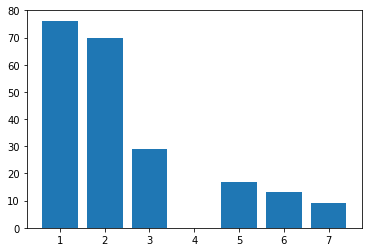

In [9]:
plt.bar(data.Type.unique(),data.Type.value_counts())
plt.ylim(0,80)

### Looking at the correlation of features

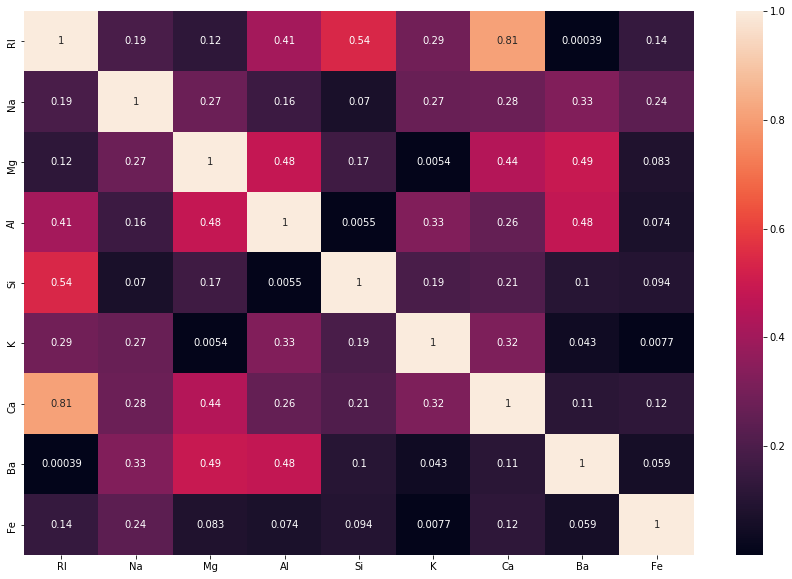

In [10]:
data2= data.drop('Type',axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr().abs(), annot= True)
plt.show()

In [11]:
y= data['Type']
x= data.drop(['Type', 'Fe', 'Ba'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

### Importing the CLASSIFIERS and other Libraries

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.model_selection import GridSearchCV,KFold

### Making a function to test different classifiers simultaneously using Dictionary.

In [15]:
def result_using_tree_classifier(x_train,x_test,y_train,y_test):
    kf = KFold(n_splits=5,random_state=None)
    scores= []
    algos2={'decision tree': {'model' : DecisionTreeClassifier(random_state=42),
                      'param' : {'criterion':['gini', 'entropy'],'max_depth' : np.arange(1,6,1).tolist()  }
                     },
           'random forest': {'model' : RandomForestClassifier(random_state=42, n_jobs= -1),
                      'param' : {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]}
                     },
           'extra tree' : {'model' : ExtraTreesClassifier(random_state=42, n_jobs= -1),
                    'param' : {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]}
                     } 
           } 
    for algo_name, params in algos2.items() :
        Grid2 = GridSearchCV( params['model'], params['param'], cv=kf, return_train_score=False)
        Grid2.fit(x_train, y_train)
        ypred= Grid2.predict(x_test)
        scores.append({
            'model' : algo_name,
            'best_score': Grid2.best_score_,
            'best_para': Grid2.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_para']).set_index('model')
result_using_tree_classifier(x_train,x_test,y_train,y_test)

,best_score,best_para
model,,
decision tree,0.67500,"{'criterion': 'gini', 'max_depth': 5}"
random forest,0.76250,{'n_estimators': 40}
extra tree,0.76875,{'n_estimators': 50}


## Conclusion

Here, we can see 'random forest' performs decently but, 'extra tree' is slightly better than it.